# Scheduling loads with Forward Dynamic Programming
## ELEC9715 Project
### Cameron Gan, Jack Munro, Edoardo Santagata

This project is a demonstration of how forward dynamic programming could be
used to schedule residential loads if the consumer was on wholesale price
exposed tariffs

Below is the wholesale price of electricity in the NSW region with the past
data in the blue and the forecast price from AEMO in the red

Also below is the past and forecast

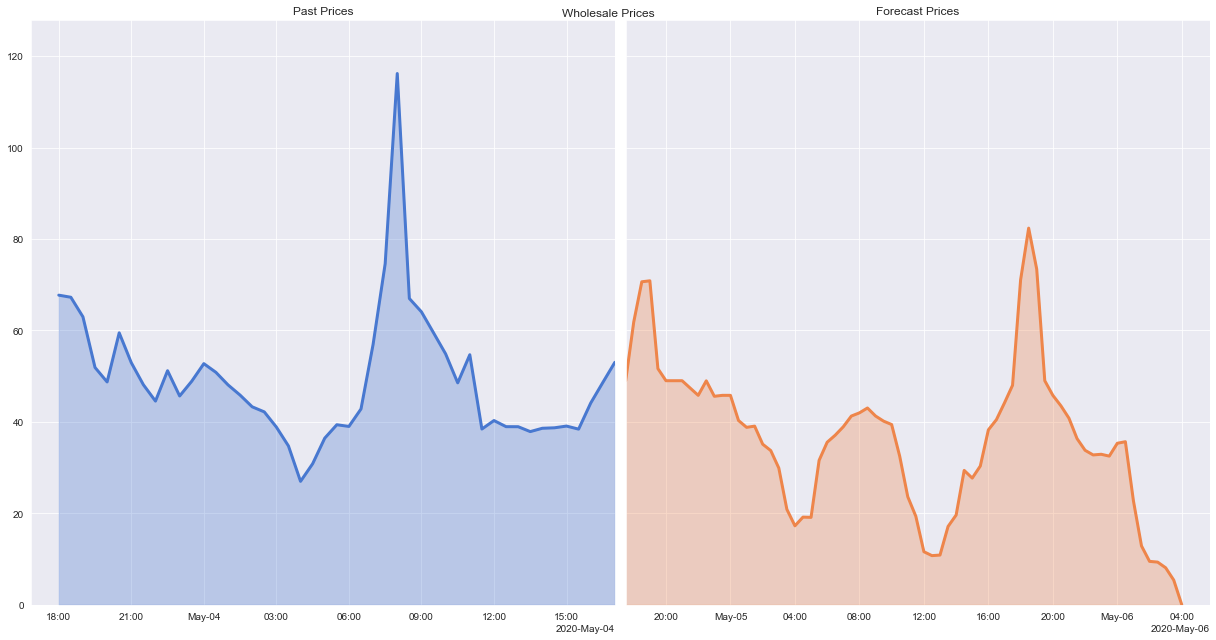

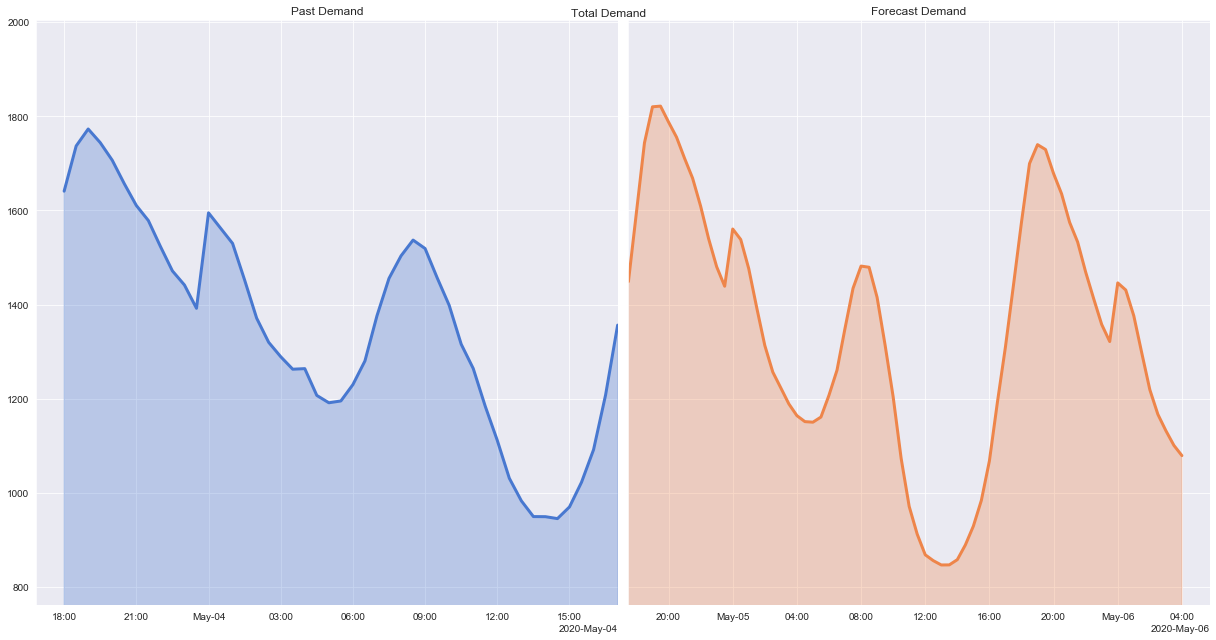

In [30]:
from projectCode.charts import chart_prices, chart_demand

state = 'SA1'

chart_prices(state)
chart_demand(state)

## Modelling Residential Loads

The model used for this demonstration for residential loads is customisable and
can be modified within certain constraints.

The appliance has six characteristics that affect how it performs:
- max_load
    - This variable dictates how much load the appliance draw when operating
    at maximum capacity in kW
- maintain_load
    - This variable dictates how much load the appliance draws when maintaining
    its current storage state in kW
- max_level
    - This is the maximum storage state of the appliance in percentage that you want
    the appliance to reach
- min_level
    - This is the minimum storage state of the appliance in percentage that the appliance
    can fall to before being turned on
- ramp_up
    - This is the ramp up of the appliance in %/30min
- ramp_down
    - This is the ramp up of the appliance in %/30min

Changing any of these characteristics changes the scheduling of the appliance

In [26]:
from projectCode.appliance import Appliance

max_load = 5
maintain_load = 100
max_level = 1
min_level = 0.5
ramp_up = 0.1
ramp_down = 0.1

app = Appliance(max_load, maintain_load, max_level, min_level, ramp_up, ramp_down)

app.print()

Max Load: 5
Maintain Load: 100
Max Level: 1
Min Level: 0.5
Ramp up: 0.1
Ramp down: 0.1


## The dynamic programming part

The model uses this appliance in its algorithm along with as starting
state for the appliance and a resolution. It is best if the resolution is
kept at 1000 otherwise the software breaks at this point in development



Completed the scheduling


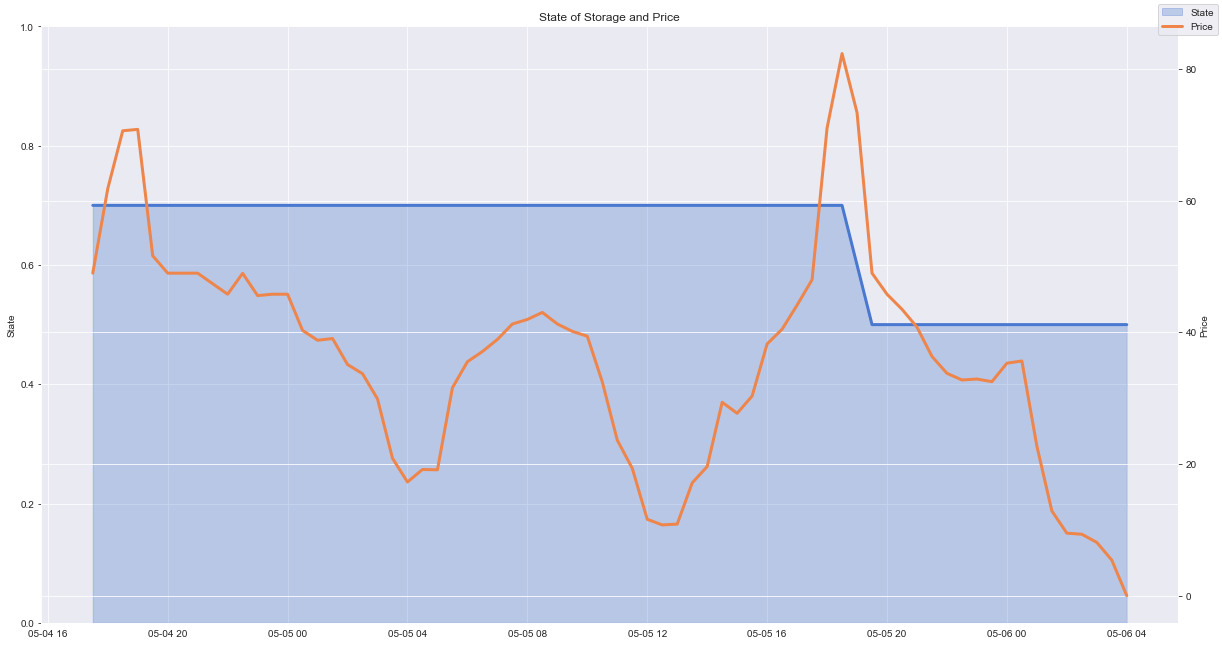

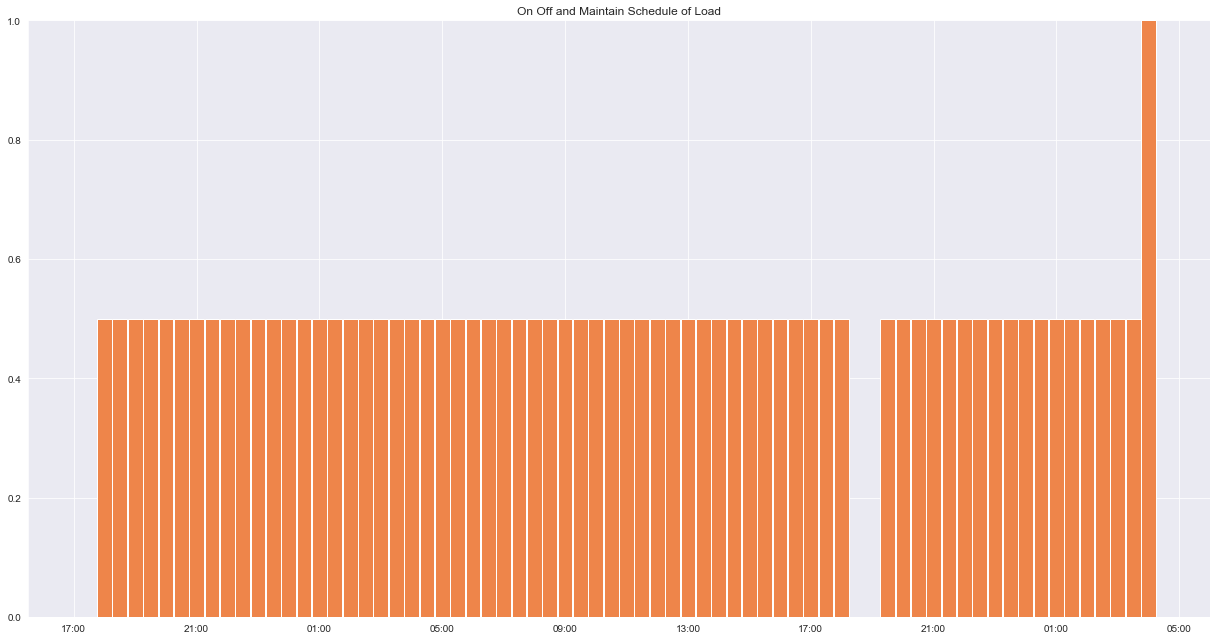

In [27]:
from projectCode.model import Model
from projectCode.charts import show_load_schedule, show_state_price

start_percentage = 0.7
state = 'SA1'
n = 1000

our_model = Model(start_percentage, n, app, state)

our_model.run_model()

print('Completed the scheduling')

our_model.get_cheapest_path()

show_state_price(our_model)
show_load_schedule(our_model)


## Cheapest Path vs Cheapest Path to State
The algorithm returns the cheapest path till to the end of the forecast prices however this
behaviour is not exactly what we want as the cheapest path is always to dump all
storage left in the appliance

The model includes the functionality to return a path to between a range of final states. This does not
guarantee a solution however and may fail.

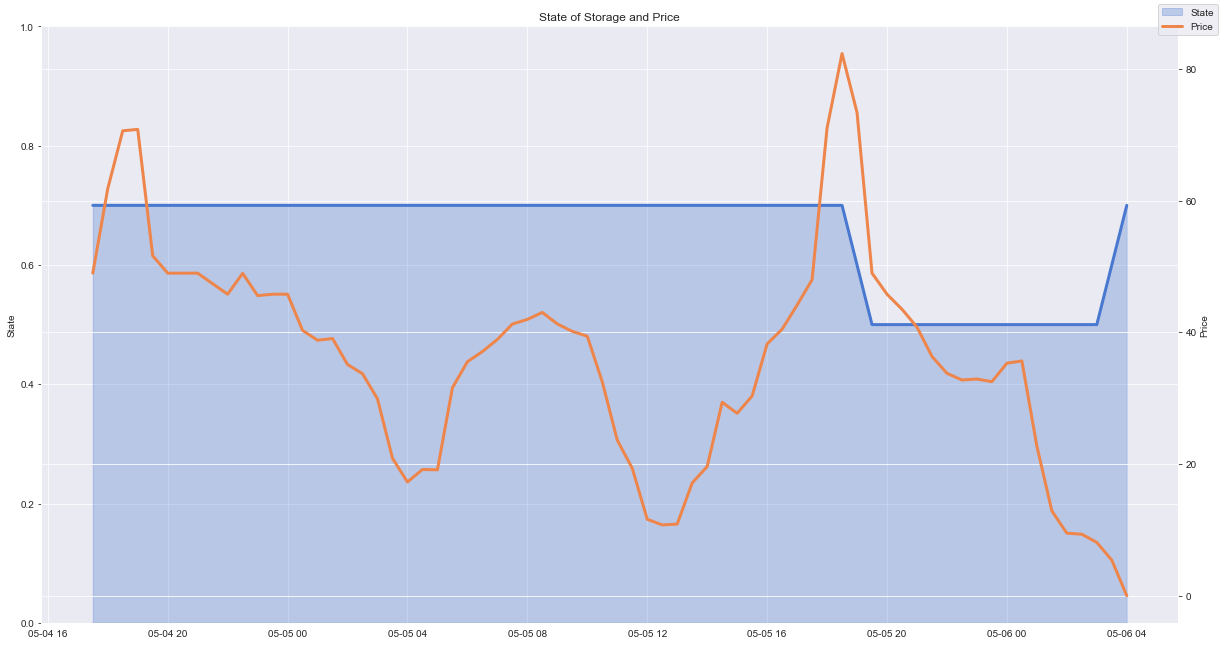

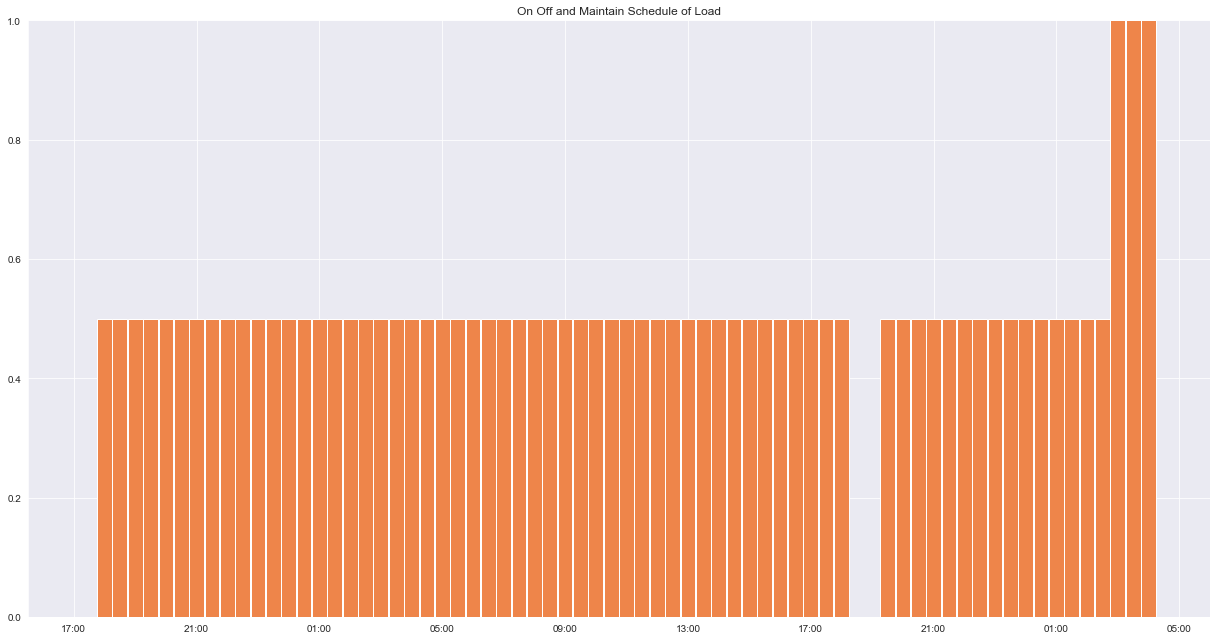

In [28]:
our_model.get_cheapest_path_to_level(0.8, 0.7)

show_state_price(our_model)
show_load_schedule(our_model)